## Breast Cancer Prediction: Classification Models ##

### Data Source ##

The dataset used in this analysis is the 'Breast Cancer Wisconsin Dataset' which can be found at the [University of California Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

**Variables Description:**
 * ID number
 * Diagnosis (M = malignant, B = benign)
 * Ten real-valued features are computed for each cell nucleus:
     * radius (mean of distances from center to points on the perimeter)
     * texture (standard deviation of gray-scale values)
     * perimeter
     * Area
     * Smoothness (local variation in radius lengths)
     * Compactness (perimeter^2 / area - 1.0)
     * Concavity (severity of concave portions of the contour)
     * Concave points (number of concave portions of the contour)
     * Symmetry
     * Fractal dimension ("coastline approximation" - 1)



### Objective ##
Generate classification models such as Logistic Regression, Support Vector Machine, and K-Nearest Neighbors to classify whether the patient has a Malignant or Benign Tumor.

### Method ###

  - Analyze columns (remove not needed columns).
  - Level the response variable (the count of 'yes' should match the count of 'no').
  - Split the dataset into train and test datasets. Use 70% on the train dataset and 30% to the test dataset.
  - Inspect the variables range, mean, and standard deviation to determine whether scaling is needed.
  - Generate Logistic Regression, make predictions, and assess model's accuracy.
  - Generate K-Nearest Neighbors, make predictions, and assess model's accuracy.
  - Generate Support Vector Machine, make predictions, and assess model's accuracy.

### Analysis ###
  - There are 2 columns in the dataframe that are needed - id and unnamed:32. They are removed on the dataframe
  - There is a variance between the values of the response. There are 212 counts of benign/0 and 357 counts of malignant/1
  - Performed down scaling to match the counts of the responses
  - There is a significant difference between the variables mean, range and standard deviation. Performed data set scaling
  - Logisitcs Regression has an accuracy of 96%
    - True Positive - 62
    - True Negative - 61
    - False Positive - 2
    - False Negative - 3
  - K-Nearest Neighbors has an accuracy of 
    - True Positive - 62
    - True Negative - 60
    - False Positive - 3
    - False Negative - 3
  - Support Vector Machine has an accuracy of 
    - True Positive - 62
    - True Negative - 60
    - False Positive - 3
    - False Negative - 3

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
#The code is used to ignore warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
#Importing Dataset
df = pd.read_csv('BreastCancer.csv')

In [4]:
#Inspecting columns and first 5 rows
print('first 5 rows')
display(df.head()) #last column is not needed (Unnamed:32). Hence, should be deleted in the df

first 5 rows


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Analyzing the df
df.info()
#There are two columns that are not needed: id and unnamed: 32
#Removing those columns
#Also, all columns are non-null which is good
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.head() #df with only needed columns

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Diagnosis has value of either M (malignant) or B (benign)
print('Unique values of diagnosis:', df['diagnosis'].unique())
print('M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous')

Unique values of diagnosis: ['M' 'B']
M (malignant) means tumor is cancerous and B (benign) means tumor is not cancerous


In [8]:
#For consistency analysis, we will use 0 for B (benign) and 1 for M (malignant)
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#There is a significant difference between the count of 0 (benign) and 1 (malignant)
print(df['diagnosis'].value_counts())
print(" ")
print("We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows")

0    357
1    212
Name: diagnosis, dtype: int64
 
We need to either increase the count of 1 (malignant) by replicating it or decrease the count of 0 (benign) by droping some rows


In [10]:
#Splitting the dataframe. We will drop some rows of df_zero to match the number of rows of df_one
df_one = df[df['diagnosis'] == 1]
print('df_one:', df_one.shape)
df_zero = df[df['diagnosis'] == 0]
print('df_zero:', df_zero.shape)

df_one: (212, 31)
df_zero: (357, 31)


In [11]:
#Dropping rows of df_zero by random
df_zero = df_zero.sample(len(df_one), axis = 0)
df_zero

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
325,0,12.67,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.13840,0.12120,0.10200,0.05602,0.2688,0.06888
550,0,10.86,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,...,11.66,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592
403,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.11720,0.19580,0.18100,0.08388,0.3297,0.07834
371,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
275,0,11.89,17.36,76.20,435.6,0.12250,0.07210,0.059290,0.07404,0.2015,...,12.40,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,13.75,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.02344,0.1773,...,15.01,26.34,98.00,706.0,0.09368,0.14420,0.13590,0.06106,0.2663,0.06321
148,0,14.44,15.18,93.97,640.1,0.09970,0.10210,0.084870,0.05532,0.1724,...,15.85,19.85,108.60,766.9,0.13160,0.27350,0.31030,0.15990,0.2691,0.07683
350,0,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,...,13.28,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825
540,0,11.54,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134


In [12]:
#Concatenate df_one and df_zero
df_final = pd.concat([df_zero, df_one])
df_final

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
325,0,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.1384,0.12120,0.10200,0.05602,0.2688,0.06888
550,0,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
403,0,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
371,0,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.17370,0.13620,0.08178,0.2487,0.06766
275,0,11.89,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,0.2015,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.41860,0.65990,0.25420,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.30940,0.34030,0.14180,0.2218,0.07820


<AxesSubplot:>

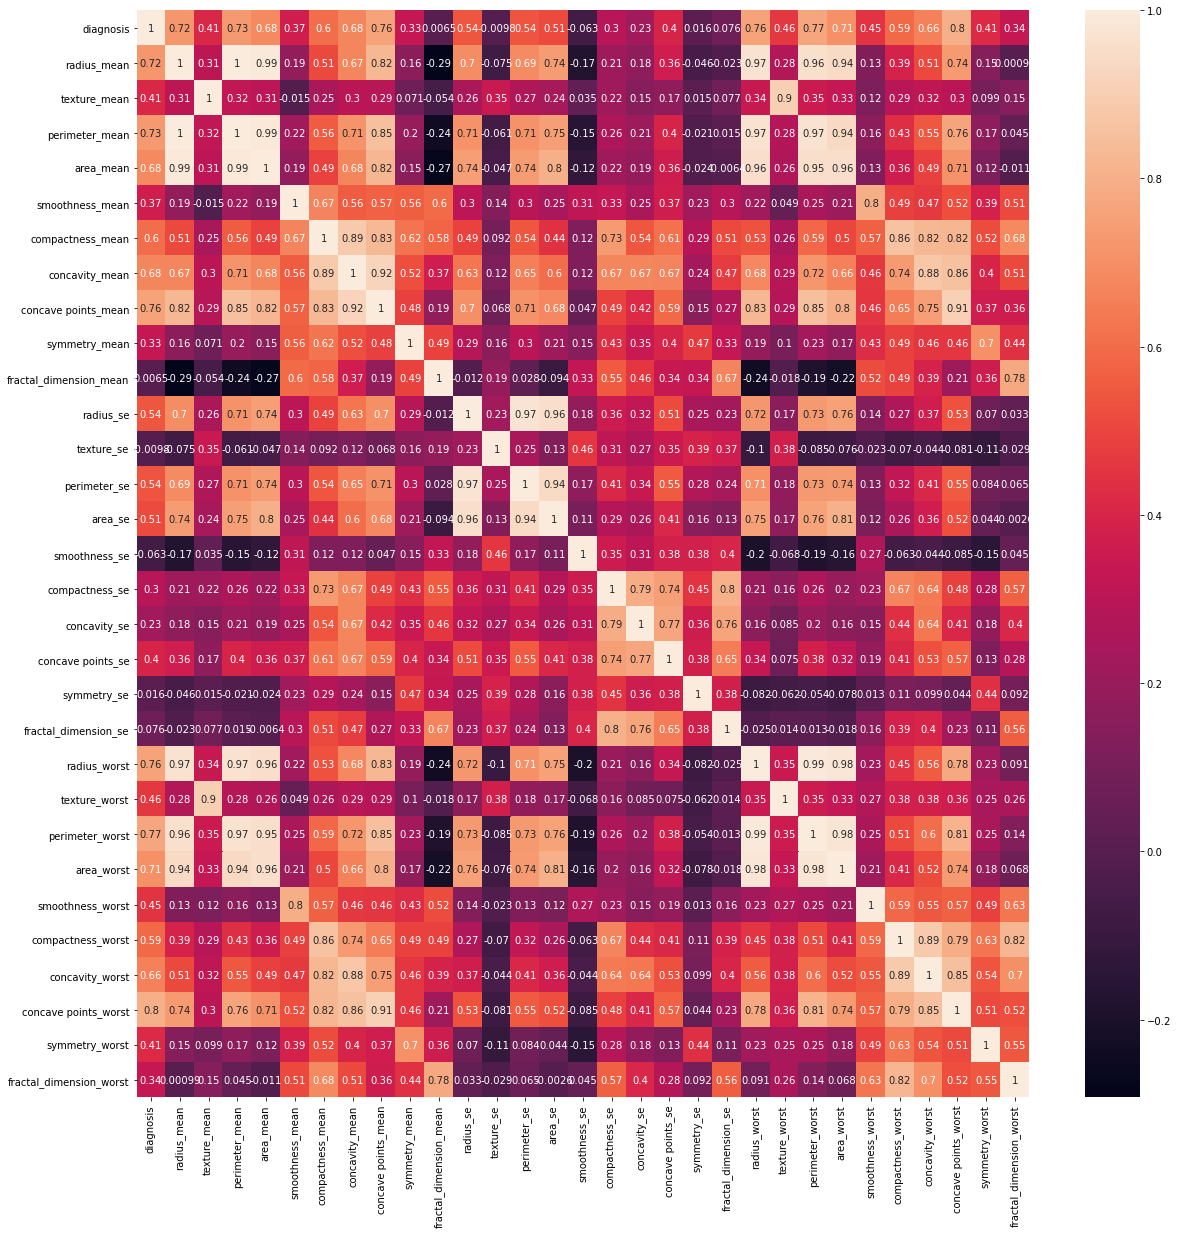

In [13]:
#Analyzing variables correlation
#There are variables that are highly correlated and there are not
#There are variables that are negatively and postively correlated
#Regarless, we will use all variables. We inspected correlation as we might need it if there are some issues with the result later
correlation = df_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot = True)

In [14]:
#Setting response column to y 
#Setting predictor columns to x
y = 'diagnosis'
x = []
for i in df_final.columns:
    if i != y:
        x.append(i)
print('Here is the response column:', y)
print(' ')
print('Here are the predictors column:', x)

Here is the response column: diagnosis
 
Here are the predictors column: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [15]:
#df_x is the dataframe for predictor columns
df_x = df_final[x]
#df_y is the dataframe for response column
df_y = df_final[[y]]
display(df_x.head())
display(df_y.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
325,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984,...,13.71,21.10,88.70,574.4,0.1384,0.12120,0.10200,0.05602,0.2688,0.06888
550,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
403,12.94,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,0.06200,...,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
371,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.17370,0.13620,0.08178,0.2487,0.06766
275,11.89,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,0.2015,0.05875,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033


,diagnosis
325,0
550,0
403,0
371,0
275,0


In [16]:
#Splitting the data into training set and test set
#70% to the training set and 30% to the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=60)
print('x_train dimension:', x_train.shape)
print('y_train dimension', y_train.shape)
print('x_test dimension', x_test.shape)
print('y_test dimension', y_test.shape)

x_train dimension: (296, 30)
y_train dimension (296, 1)
x_test dimension (128, 30)
y_test dimension (128, 1)


In [17]:
#The table below shows that there is a big variance on the mean and std. Example: smoothness and area
#We need to scale the data to elimate the said issue
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,14.829811,19.611385,96.836993,724.564527,0.097985,0.111752,0.102712,0.057337,0.184862,0.062555,...,17.321757,26.106047,114.404426,1002.005068,0.134402,0.271666,0.297605,0.126997,0.296200,0.084481
std,3.757860,4.057854,25.964069,384.640251,0.014925,0.056351,0.085372,0.041219,0.028288,0.007388,...,5.203956,5.910652,36.255105,631.442938,0.023090,0.170071,0.212687,0.068417,0.063927,0.018626
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.122000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.164800,0.055210
25%,12.022500,16.847500,76.925000,445.325000,0.087585,0.067210,0.032872,0.022502,0.164100,0.056988,...,13.327500,22.067500,86.652500,548.500000,0.117150,0.148500,0.123900,0.070108,0.251225,0.070945
50%,13.920000,19.430000,90.370000,599.450000,0.097610,0.103150,0.085335,0.052490,0.182100,0.061180,...,15.935000,25.750000,105.850000,785.050000,0.135000,0.231650,0.263350,0.123650,0.287750,0.079900
75%,17.547500,22.047500,115.025000,957.250000,0.107525,0.144350,0.152350,0.086260,0.198050,0.065765,...,20.670000,30.372500,138.450000,1323.750000,0.149100,0.358300,0.423825,0.182000,0.323575,0.093647
max,28.110000,31.120000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,47.160000,251.200000,4254.000000,0.218400,0.937900,1.170000,0.290300,0.663800,0.173000


In [18]:
#Fitting scaler to the train dataset
scaler = StandardScaler()
scaler.fit(x_train)

#Scaling train and test dataset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Logistic Regression Model**

In [19]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [20]:
#Training the model and predicting using the model
#Using the 
test_pred_logreg = logreg.predict(x_test_scaled)
test_pred_logreg

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [21]:
#Computing the accuracy of the model
logistic_regression_accuracy = accuracy_score(y_test, test_pred_logreg)
print('The Logistic Regression accuracy is:', round(logistic_regression_accuracy,2))

The Logistic Regression accuracy is: 0.96


Logistic Regression Confusion Matrix
Accuracy is 0.96


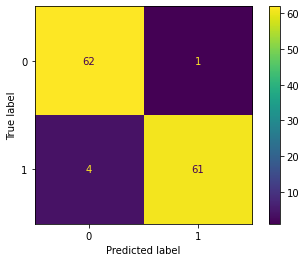

In [22]:
#Displaying the confusion Matrix
confusion_matrix(y_test, test_pred_logreg)
plot_confusion_matrix(logreg, x_test_scaled, y_test)
print('Logistic Regression Confusion Matrix')
print('Accuracy is', round(logistic_regression_accuracy,2))

**K Nearest Neighbors**

In [23]:
#KNN Model
#Setting the value of K
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
test_pred_knn = classifier.predict(x_test_scaled)
test_pred_knn

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [25]:
knn_accuracy = accuracy_score(y_test, test_pred_knn)
print('The K-Nearest Neighbors accuracy is:', round(knn_accuracy,2))

The K-Nearest Neighbors accuracy is: 0.94


K Nearest Neighbor Confusion Matrix
Accuracy is 0.94


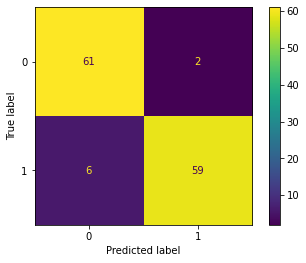

In [26]:
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('K Nearest Neighbor Confusion Matrix')
print('Accuracy is', round(knn_accuracy,2))

**Support Vector Machine**

In [27]:
#Generating SVM and setting parameters
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train_scaled, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [28]:
#Predicting using the SVM model
test_pred_svm=classifier.predict(x_test_scaled)
test_pred_svm

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [29]:
#Computing SVM Accuracy
svm_accuracy = accuracy_score(y_test, test_pred_svm)
print('The Support Vector Machine accuracy is:', round(svm_accuracy,2))

The Support Vector Machine accuracy is: 0.95


Support Vector Machine Confusion Matrix
Accuracy is 0.95


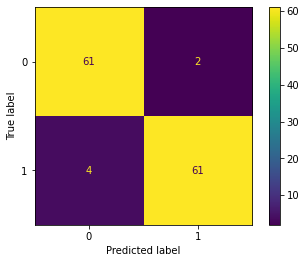

In [30]:
#Generating the SVM Confusion Matrix
plot_confusion_matrix(classifier, x_test_scaled, y_test)
print('Support Vector Machine Confusion Matrix')
print('Accuracy is', round(svm_accuracy,2))

**Summary of Results**

In [31]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]



In [32]:
#Logistic Regression TN,FP,FN and TP
logreg_TN = confusion_matrix(y_test, test_pred_logreg)[0][0]
logreg_FP = confusion_matrix(y_test, test_pred_logreg)[0][1]
logreg_FN = confusion_matrix(y_test, test_pred_logreg)[1][0]
logreg_TP = confusion_matrix(y_test, test_pred_logreg)[1][1]

In [33]:
#K Nearest Neighbors TN,FP,FN and TP
knn_TN = confusion_matrix(y_test, test_pred_knn)[0][0]
knn_FP = confusion_matrix(y_test, test_pred_knn)[0][1]
knn_FN = confusion_matrix(y_test, test_pred_knn)[1][0]
knn_TP = confusion_matrix(y_test, test_pred_knn)[1][1]

In [34]:
#SVM TN, FP, FN, and TP
svm_TN = confusion_matrix(y_test, test_pred_svm)[0][0]
svm_FP = confusion_matrix(y_test, test_pred_svm)[0][1]
svm_FN = confusion_matrix(y_test, test_pred_svm)[1][0]
svm_TP = confusion_matrix(y_test, test_pred_svm)[1][1]

In [35]:
models = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine']
accuracy = [logistic_regression_accuracy,knn_accuracy, svm_accuracy ]
true_negative = [logreg_TN, knn_TN, svm_TN]
false_positive = [logreg_FP, knn_FP, svm_FP]
false_negative = [logreg_FN, knn_FN, svm_FN]
true_positive = [logreg_TP, logreg_TP, svm_TP]

data = {'Model': models, 'Accuracy': accuracy, 'True Positive': true_positive, 'True Negative': true_negative, 
       'False Positive': false_positive, 'False Negative': false_negative}
result_df = pd.DataFrame(data)
display(result_df)

,Model,Accuracy,True Positive,True Negative,False Positive,False Negative
0,Logistic Regression,0.960938,61,62,1,4
1,K Nearest Neighbors,0.937500,61,61,2,6
2,Support Vector Machine,0.953125,61,61,2,4


### Conclusion ###
There are 3 models generated on the analysis. The best model is Logistic Regression which has 96% accuracy. 